# Proyecto Final - Reconocimiento de manzanas rojas y verdes

- 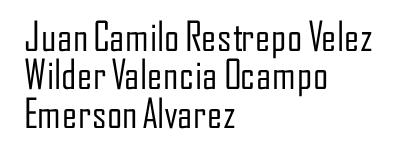

In [0]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Instalación de paquetes para tratamiento de imagenes
from PIL import Image

#Lectura de imagenes en la carpeta
import os, sys

# 1) Preparación de datos

In [0]:
#Lectura de la carpeta de manzanas rojas
path = "R"
files = os.listdir(path)
mat_hist = [] #Matriz con los histograma
nombres = [] #Nombres de los archivos
#Se leen las imagenes y se calcula el histograma
for f in files:
  if f.endswith('.jpg'):
    print(f) #Nombre de la imagen
    nombres.append(f)
    img = Image.open('R/' + f) #Leer la imagen
    img = img.resize((500,500))
    img = img.convert('RGB')
    hist = img.histogram() #Calculamos histograma de color
    mat_hist.append(hist) #Adicianar el histograma

rojas = pd.DataFrame(mat_hist) #Data frame con los histogramas
rojas['clase'] = "Rojas"

R08.jpg
R48.jpg
R55.jpg
R41.jpg
R12.jpg
R44.jpg
R04.jpg
R46.jpg
R33.jpg
R54.jpg
R40.jpg
R42.jpg
R52.jpg
R37.jpg
R22.jpg
R15.jpg
R21.jpg
R10.jpg
R01.jpg
R24.jpg
R18.jpg
R38.jpg
R31.jpg
R35.jpg
R11.jpg
R14.jpg
R32.jpg
R56.jpg
R59.jpg
R30.jpg
R36.jpg
R02.jpg
R39.jpg
R28.jpg
R51.jpg
R06.jpg
R25.jpg
R23.jpg
R47.jpg
R50.jpg
R58.jpg
R17.jpg
R05.jpg
R27.jpg
R49.jpg
R26.jpg
R03.jpg
R20.jpg
R07.jpg
R43.jpg
R53.jpg
R13.jpg
R45.jpg
R16.jpg
R57.jpg
R29.jpg
R34.jpg
R19.jpg
R09.jpg
R60.jpg


In [0]:
#Lectura de la carpeta de personas
path = "V"
files = os.listdir(path)
mat_hist = []
for f in files:
  if f.endswith('.jpg'):
    print(f)
    nombres.append(f)
    img = Image.open('V/' + f)
    img = img.resize((500,500))
    img = img.convert('RGB')
    hist = img.histogram()
    mat_hist.append(hist)
  
verdes = pd.DataFrame(mat_hist) 
verdes['clase'] = "Verdes"

V38.jpg
V50.jpg
V12.jpg
V28.jpg
V36.jpg
V07.jpg
V04.jpg
V37.jpg
V08.jpg
V11.jpg
V43.jpg
V25.jpg
V10.jpg
V27.jpg
V23.jpg
V03.jpg
V29.jpg
V14.jpg
V05.jpg
V01.jpg
V46.jpg
V41.jpg
V31.jpg
V39.jpg
V47.jpg
V26.jpg
V44.jpg
V32.jpg
V33.jpg
V45.jpg
V18.jpg
V06.jpg
V42.jpg
V21.jpg
V40.jpg
V09.jpg
V35.jpg
V19.jpg
V13.jpg
V02.jpg
V16.jpg
V20.jpg
V15.jpg
V17.jpg
V30.jpg
V24.jpg
V34.jpg
V49.jpg
V48.jpg
V22.jpg


In [0]:
data = pd.concat([rojas, verdes], axis=0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,clase
0,40,14,22,20,24,28,39,45,44,46,60,62,57,52,67,52,57,69,72,79,88,87,126,96,118,126,110,122,127,143,124,153,184,190,175,217,241,260,264,268,...,79,69,57,60,46,36,34,31,33,30,28,22,19,12,17,8,14,4,5,3,2,1,4,2,3,1,0,1,0,0,1,0,0,1,0,0,0,0,0,Rojas
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,3,5,5,10,19,32,40,40,35,55,110,125,120,173,...,3,5,2,2,0,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rojas
2,2791,859,743,1206,736,1153,1037,663,924,733,777,683,632,580,628,623,567,580,565,606,523,545,516,542,490,532,513,469,485,473,536,486,513,455,500,473,508,492,477,469,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rojas
3,35,25,20,27,41,78,128,137,214,215,262,317,383,372,425,389,442,514,467,487,515,524,588,627,627,555,486,527,532,428,455,460,427,503,461,543,619,637,644,686,...,317,363,351,339,323,363,351,366,366,376,387,426,411,440,403,499,446,474,499,466,470,517,526,500,488,459,526,493,416,475,454,574,342,236,160,123,134,106,183,Rojas
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,1,1,0,2,3,4,11,2,4,5,10,12,8,13,14,15,10,...,57,50,53,49,57,45,48,50,48,46,62,42,53,48,37,37,35,35,32,33,38,24,21,28,24,26,25,15,18,19,15,23,7,19,10,1,4,3,21,Rojas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,7,7,14,19,16,...,83,109,137,95,110,106,71,95,68,68,87,100,74,95,85,81,113,77,65,69,86,66,152,132,231,253,271,232,225,264,193,196,170,188,271,226,231,331,793,Verdes
46,2081,430,412,519,601,594,773,895,863,880,1096,1139,1147,1286,1332,1439,1477,1595,1425,1966,1973,2032,1551,1819,1664,1509,1456,1327,1464,1495,1294,1196,1066,1203,1190,1208,1253,1229,1255,1344,...,31,51,29,33,19,14,24,12,12,19,15,24,0,12,26,6,15,3,6,6,0,11,12,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,Verdes
47,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,1,3,0,2,0,6,4,2,8,9,8,4,9,5,2,3,3,1,0,2,1,0,20,9,...,13,17,18,13,20,16,22,15,23,22,21,23,40,19,10,30,30,13,22,21,22,31,23,27,23,39,62,58,60,130,86,273,213,622,696,372,1090,457,128365,Verdes
48,197,68,87,83,108,113,179,200,254,282,392,473,570,603,820,973,950,935,1069,1155,1278,1264,1500,1543,1550,1732,1730,1857,1937,2010,2098,2347,2208,2298,2419,2516,2529,2578,2525,2405,...,2,8,2,6,2,8,8,3,9,6,1,3,8,3,3,2,8,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Verdes


In [0]:
for i in data.columns:
  data[i] = data[i].fillna(value = 0)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,clase
0,40,14,22,20,24,28,39,45,44,46,60,62,57,52,67,52,57,69,72,79,88,87,126,96,118,126,110,122,127,143,124,153,184,190,175,217,241,260,264,268,...,79,69,57,60,46,36,34,31,33,30,28,22,19,12,17,8,14,4,5,3,2,1,4,2,3,1,0,1,0,0,1,0,0,1,0,0,0,0,0,Rojas
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,3,5,5,10,19,32,40,40,35,55,110,125,120,173,...,3,5,2,2,0,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rojas
2,2791,859,743,1206,736,1153,1037,663,924,733,777,683,632,580,628,623,567,580,565,606,523,545,516,542,490,532,513,469,485,473,536,486,513,455,500,473,508,492,477,469,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Rojas
3,35,25,20,27,41,78,128,137,214,215,262,317,383,372,425,389,442,514,467,487,515,524,588,627,627,555,486,527,532,428,455,460,427,503,461,543,619,637,644,686,...,317,363,351,339,323,363,351,366,366,376,387,426,411,440,403,499,446,474,499,466,470,517,526,500,488,459,526,493,416,475,454,574,342,236,160,123,134,106,183,Rojas
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,1,1,0,2,3,4,11,2,4,5,10,12,8,13,14,15,10,...,57,50,53,49,57,45,48,50,48,46,62,42,53,48,37,37,35,35,32,33,38,24,21,28,24,26,25,15,18,19,15,23,7,19,10,1,4,3,21,Rojas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,7,7,14,19,16,...,83,109,137,95,110,106,71,95,68,68,87,100,74,95,85,81,113,77,65,69,86,66,152,132,231,253,271,232,225,264,193,196,170,188,271,226,231,331,793,Verdes
46,2081,430,412,519,601,594,773,895,863,880,1096,1139,1147,1286,1332,1439,1477,1595,1425,1966,1973,2032,1551,1819,1664,1509,1456,1327,1464,1495,1294,1196,1066,1203,1190,1208,1253,1229,1255,1344,...,31,51,29,33,19,14,24,12,12,19,15,24,0,12,26,6,15,3,6,6,0,11,12,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,Verdes
47,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,1,3,0,2,0,6,4,2,8,9,8,4,9,5,2,3,3,1,0,2,1,0,20,9,...,13,17,18,13,20,16,22,15,23,22,21,23,40,19,10,30,30,13,22,21,22,31,23,27,23,39,62,58,60,130,86,273,213,622,696,372,1090,457,128365,Verdes
48,197,68,87,83,108,113,179,200,254,282,392,473,570,603,820,973,950,935,1069,1155,1278,1264,1500,1543,1550,1732,1730,1857,1937,2010,2098,2347,2208,2298,2419,2516,2529,2578,2525,2405,...,2,8,2,6,2,8,8,3,9,6,1,3,8,3,3,2,8,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Verdes


In [0]:
#codificacion de variables
data['clase'] = data['clase'].replace({'Rojas':0, 'Verdes':1})
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,clase
0,40,14,22,20,24,28,39,45,44,46,60,62,57,52,67,52,57,69,72,79,88,87,126,96,118,126,110,122,127,143,124,153,184,190,175,217,241,260,264,268,...,79,69,57,60,46,36,34,31,33,30,28,22,19,12,17,8,14,4,5,3,2,1,4,2,3,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3,3,5,5,10,19,32,40,40,35,55,110,125,120,173,...,3,5,2,2,0,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2791,859,743,1206,736,1153,1037,663,924,733,777,683,632,580,628,623,567,580,565,606,523,545,516,542,490,532,513,469,485,473,536,486,513,455,500,473,508,492,477,469,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,35,25,20,27,41,78,128,137,214,215,262,317,383,372,425,389,442,514,467,487,515,524,588,627,627,555,486,527,532,428,455,460,427,503,461,543,619,637,644,686,...,317,363,351,339,323,363,351,366,366,376,387,426,411,440,403,499,446,474,499,466,470,517,526,500,488,459,526,493,416,475,454,574,342,236,160,123,134,106,183,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,1,1,0,2,3,4,11,2,4,5,10,12,8,13,14,15,10,...,57,50,53,49,57,45,48,50,48,46,62,42,53,48,37,37,35,35,32,33,38,24,21,28,24,26,25,15,18,19,15,23,7,19,10,1,4,3,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,1,7,7,14,19,16,...,83,109,137,95,110,106,71,95,68,68,87,100,74,95,85,81,113,77,65,69,86,66,152,132,231,253,271,232,225,264,193,196,170,188,271,226,231,331,793,1
46,2081,430,412,519,601,594,773,895,863,880,1096,1139,1147,1286,1332,1439,1477,1595,1425,1966,1973,2032,1551,1819,1664,1509,1456,1327,1464,1495,1294,1196,1066,1203,1190,1208,1253,1229,1255,1344,...,31,51,29,33,19,14,24,12,12,19,15,24,0,12,26,6,15,3,6,6,0,11,12,0,0,0,0,0,0,3,0,0,4,0,0,0,0,0,0,1
47,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,1,3,0,2,0,6,4,2,8,9,8,4,9,5,2,3,3,1,0,2,1,0,20,9,...,13,17,18,13,20,16,22,15,23,22,21,23,40,19,10,30,30,13,22,21,22,31,23,27,23,39,62,58,60,130,86,273,213,622,696,372,1090,457,128365,1
48,197,68,87,83,108,113,179,200,254,282,392,473,570,603,820,973,950,935,1069,1155,1278,1264,1500,1543,1550,1732,1730,1857,1937,2010,2098,2347,2208,2298,2419,2516,2529,2578,2525,2405,...,2,8,2,6,2,8,8,3,9,6,1,3,8,3,3,2,8,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# 2. División 70-30

In [0]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("clase", axis = 1) 
Y = data['clase']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)
Y_train.value_counts()

0    42
1    35
Name: clase, dtype: int64

#3. Aprendizaje del modelo

## A) BackPropagation

In [0]:
#Creación del modelo 
from sklearn.neural_network import MLPClassifier
model_A = MLPClassifier(activation="identity",hidden_layer_sizes=(50),learning_rate="adaptive",learning_rate_init=0.01,momentum=0.09,max_iter=20,verbose=True,random_state=1)
model_A.fit(X_train, Y_train)





Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = inf
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = inf
Iteration 14, loss = inf
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = inf


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='adaptive',
              learning_rate_init=0.01, max_iter=20, momentum=0.09,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

##B. DeepLearning

In [0]:
#Creación del modelo 
from keras.models import Sequential
from keras.layers.core import Dense
model_B=Sequential()
model_B.add(Dense(400,input_dim=768, activation='relu'))
model_B.add(Dense(100, activation='relu'))
model_B.add(Dense(200, activation='relu'))
model_B.add(Dense(1, activation='sigmoid'))
model_B.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model_B.fit(X_train, Y_train, epochs=100)





Epoch 1/100
77/77 [==============================] - 0s 3ms/step - loss: 0.4545 - acc: 0.5455
Epoch 2/100
77/77 [==============================] - 0s 299us/step - loss: 0.4545 - acc: 0.5455
Epoch 3/100
77/77 [==============================] - 0s 377us/step - loss: 0.4545 - acc: 0.5455
Epoch 4/100
77/77 [==============================] - 0s 324us/step - loss: 0.4545 - acc: 0.5455
Epoch 5/100
77/77 [==============================] - 0s 309us/step - loss: 0.4545 - acc: 0.5455
Epoch 6/100
77/77 [==============================] - 0s 311us/step - loss: 0.4545 - acc: 0.5455
Epoch 7/100
77/77 [==============================] - 0s 388us/step - loss: 0.4545 - acc: 0.5455
Epoch 8/100
77/77 [==============================] - 0s 326us/step - loss: 0.4545 - acc: 0.5455
Epoch 9/100
77/77 [==============================] - 0s 334us/step - loss: 0.4545 - acc: 0.5455
Epoch 10/100
77/77 [==============================] - 0s 299us/step - loss: 0.4545 - acc: 0.5455
Epoch 11/100
77/77 [=====================

## C) Arbol de decision

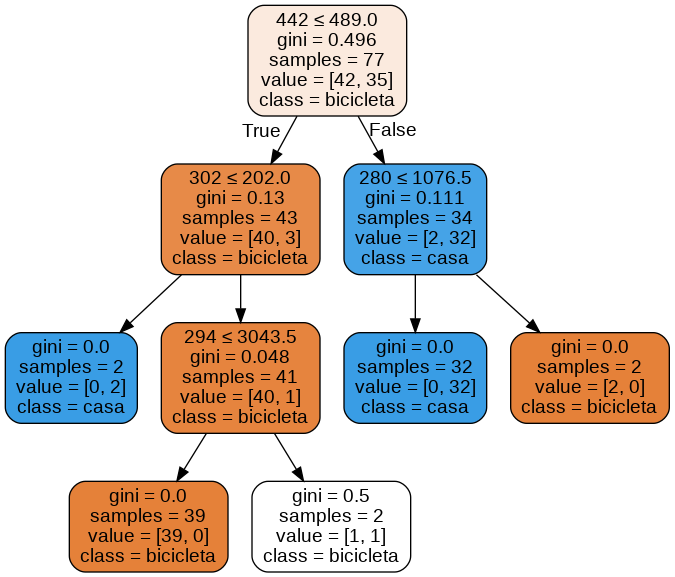

In [0]:
#Creación del modelo 
from sklearn import tree
model_C = tree.DecisionTreeClassifier(min_samples_leaf=2, max_depth=10)
model_C.fit(X_train, Y_train)


from sklearn.externals.six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
var_predictoras = X.columns.values
nom_clases= ['bicicleta','casa']
export_graphviz(model_C, feature_names=var_predictoras, class_names= nom_clases, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


## D) Knn

In [0]:
#Creación del modelo con el conjunto de entrenamiento
from sklearn import neighbors
model_D = neighbors.KNeighborsClassifier(n_neighbors=21, metric='euclidean')
model_D.fit(X_train,Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

# 4. Evaluación del modelo sobre el conjunto de prueba
- Exactitud

## A) BackPropagation

In [0]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics
Y_pred = model_A.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud BackPropagation : {acc}')


Exactitud BackPropagation : 0.9696969696969697


##B. DeepLearning

In [0]:
#Evaluación sobre el conjunto de prueba

print(f'Exactitud Aprendizaje Profundo: {model_B.evaluate(X_test, Y_test)}')

33/33 [==============================] - 0s 2ms/step
Exactitud Aprendizaje Profundo: [0.45454545454545453, 0.5454545454545454]


## C) Arbol de decision

In [0]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics
Y_pred = model_C.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud Arbol de decision: {acc}')


Exactitud Arbol de decision: 0.9090909090909091


## D) Knn

In [0]:
#Evaluación sobre el conjunto de prueba
from sklearn import metrics
Y_pred = model_D.predict(X_test)
acc=metrics.accuracy_score(Y_test, Y_pred)
print(f'Exactitud Knn: {acc}')


Exactitud Knn: 0.8787878787878788


# 5. Predicción para datos futuros
- Cargamos los datos futuros
- Preparamos los datos futuros y creamos tfidf
- Aplicamos el modelo para la predicción

In [0]:
#Instalación de paquetes para tratamiento de imagenes
from PIL import Image

#Lectura de imagenes en la carpeta
import os, sys
#Lectura de la carpeta
path = "futuro"
files = os.listdir(path)

mat_hist = [] #Matriz con los histograma
nombres = [] #Nombres de los archivos

#Se leen las imagenes y se calcula el histograma
for f in files:
  if f.endswith('.jpg'):
    print(f) #Nombre de la imagen
    nombres.append(f)
    img = Image.open('futuro/' + f) #Leer la imagen
    img = img.resize((500,500))
    img = img.convert('RGB')
    hist = img.histogram() #Calculamos histograma de color
    mat_hist.append(hist) #Adicianar el histograma
  
data_fut = pd.DataFrame(mat_hist) #Data frame con los histogramas

FV03.jpg
FV04.jpg
FR04.jpg
FR03.jpg
FR02.jpg
FR01.jpg
FV01.jpg
FV02.jpg


In [0]:
for i in data_fut.columns:
  data_fut[i] = data_fut[i].fillna(value = 0)
data_fut

## A) BackPropagation

In [0]:
#Hacemos la predicción
Y_fut = model_A.predict(data_fut).round()
Y_real=[]
for i in Y_fut:
  if i == 0:
    Y_real.append("Roja") 
  else:
    Y_real.append("Verde")
print(Y_real)
print(Y_fut)

['Verde', 'Verde', 'Roja', 'Roja', 'Roja', 'Roja', 'Verde', 'Verde']
[1 1 0 0 0 0 1 1]
